In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import uniform

In [2]:
## fill in your uni here
uni = "jn2810"

## Q1 (20 points) 
A truncated geometric distribution with parameters $n$ (a positive integer), and $p\in(0,1)$ has the distribution of a geometric random variable conditional on it being less than or equal to n.

Implement a function geo_truncated(p, n, m) that uses the inverse transform to generate a random sample of size m from this distribution. Do not use a search. Only use the libraries/functions loaded at the top of the notebook.

Generate 1000 samples p=0.1, n = 8, using the 2000 as the seed, calculate the mean and variance of the sample, and plot the histogram of this distribution.

Recall that a $geo(p)$ distribution has the pmf $f(x) = p(1-p)^{x-1}$ for $x=1,2, ,...$$ and cdf $F(x) = 1 - (1-p)^x$ for $x=1,2,...$$

In [3]:
np.random.seed(2000)
def geo_truncated(p, n, m):
    U = uniform.rvs(size = m)
    geo = np.floor(np.log(1 - U*(1 - (1 - p) ** n)) / np.log(1 - p)) + 1
    return geo

In [4]:
print(np.mean(geo_truncated(0.1, 8, 1000)))
print(np.var(geo_truncated(0.1, 8, 1000)))

4.123
4.875935999999999


(array([177., 155., 145., 132., 119.,  99.,  99.,  74.]),
 array([1.   , 1.875, 2.75 , 3.625, 4.5  , 5.375, 6.25 , 7.125, 8.   ]),
 <BarContainer object of 8 artists>)

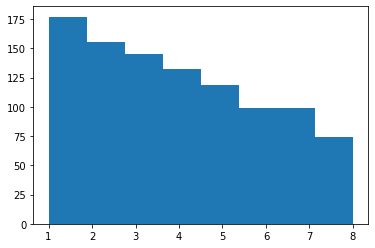

In [5]:
plt.hist(geo_truncated(0.1, 8, 1000), bins = 8)

## Q2 (10 points)

Now, implement sampling from the truncated geometric distribution using rejection sampling with the proposal distribution being just a regular geom(p). What does c end up being? 

In this part, I will allow you to use the scipy geom.rvs() method to sample from the proposal distribution.

In [6]:
from scipy.stats import geom